## Лабораторная работа 4. Правильный многоугольник Рело. Векторизация вычислений в numpy

Орешко Алёна Владимировна, 31.03.2025

## Задание 4.1. Построение треугольника Рело

Постройте представоение границы правильного треугольника Рело в виде матрицы,
каждая строка которой содержит координаты точек, описывающих границу.
Полагаем, что заданы координаты центра правильного треугольника Рело center ,
ширина треугольника Рело r и количество точек для описания одной стороны
треугольника Рело N.

**Этап 1. Вычисление координат вершин правильного треугольника**

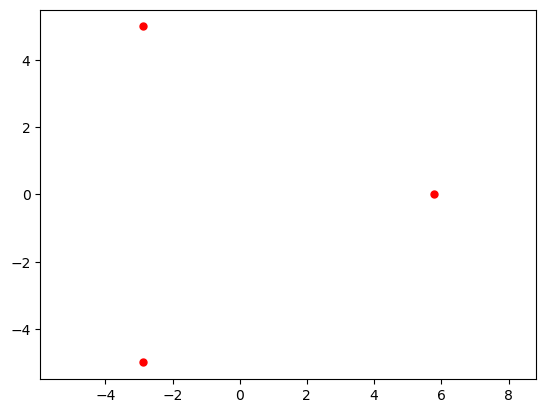

In [7]:
import numpy as np
import matplotlib.pyplot as plt
n = 3 # количество вершин треугольника Рело
center = np.array([0,0]) # координаты центра треугольника Рело
r = 10. # ширина треугольника Рело
N = 100 # количество точек для описания одной стороны треугольника Рело
l = r # !!! равенство справедливо только для треугольника Рело
R = l/(2*np.sin(np.pi/n))
t = np.arange(0,2*np.pi,2*np.pi/n)
t = np.arange(0,2*np.pi,2*np.pi/n)
vertices = center + R*np.transpose([np.cos(t), np.sin(t)])
plt.plot(vertices[:,0],vertices[:,1],'r.',markersize=10)
plt.axis('equal');

**Этап 2. Представление одной стороны треугольника Рело**

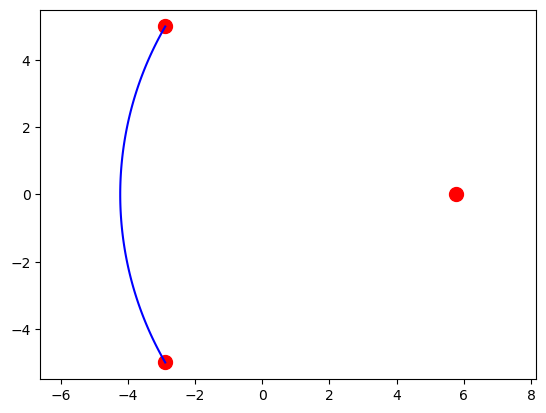

In [10]:
alpha = 2*np.pi/n
beta = alpha/2
angle = np.linspace(-beta/2, beta/2, N)
side0 = vertices[0] + r*np.transpose([np.cos(angle + np.pi),
 np.sin(angle + np.pi)])
plt.plot(vertices[:,0],vertices[:,1],'r.',markersize=20)
plt.plot(side0[:,0],side0[:,1],'b-',markersize=20)
plt.axis('equal');

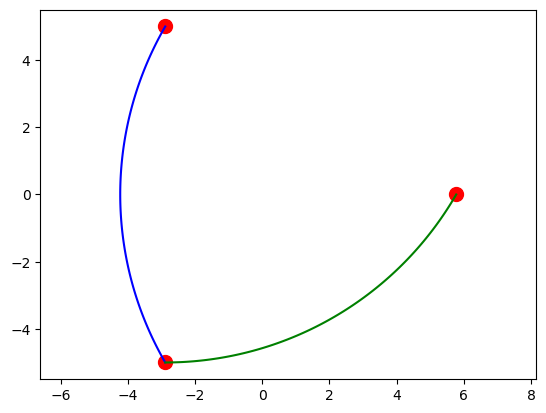

In [12]:
side1 = vertices[1] + r*np.transpose([np.cos(angle + np.pi + alpha), np.sin(angle + np.pi + alpha)])
plt.plot(vertices[:,0],vertices[:,1],'r.',markersize=20)
plt.plot(side0[:,0],side0[:,1],'b-',markersize=20)
plt.plot(side1[:,0],side1[:,1],'g-',markersize=20)
plt.axis('equal');

## Задание 4.2. Построение правильного многоугольника Рело

<span style="color:red;">Создайте</span> матричное описание границы правильного многоугольника Рело для произвольных значений переменных $n$, $\text{center}$, $r$, следуя аналогичным рассуждениям из Задания 4.1 (вычисление координат вершин, представление одной стороны, моделирование всей границы). Помните, что количество вершин многоугольника $n$ должно быть нечетным.

Обратите внимание, что длина стороны $l$ правильного многоугольника, на
основании которого строится многоугольник Рело, является неизвестной величиной
и должна быть выражена через количество вершин $n$ и ширину $r$ многоугольника
Рело. <span style="color:red;">Напишите</span> подробно, как получена аналитическая зависимость $l$ от $n$ и $r$. Объяснения оформите в тексте документа с лабораторной работой.

**Шаг 1: Определение переменных**

In [45]:
n = 9  # кол-во вершин
center = np.array([0, 0])
r = 10. 
N = 100  # кол-во точек для одной стороны

**Шаг 2: Вычисление координат вершин правильного многоугольника**

1. **Определение длины стороны**:

Длина стороны $l$ правильного многоугольника выражется через радиус описанной окружности $R$:
$$l = 2R \sin\left(\frac{\pi}{n}\right),$$
где $R$ — радиус описанной окружности:
$$R = \frac{r}{2 \sin\left(\frac{\pi}{n}\right)}$$

2. **Вычисление координат вершин**:

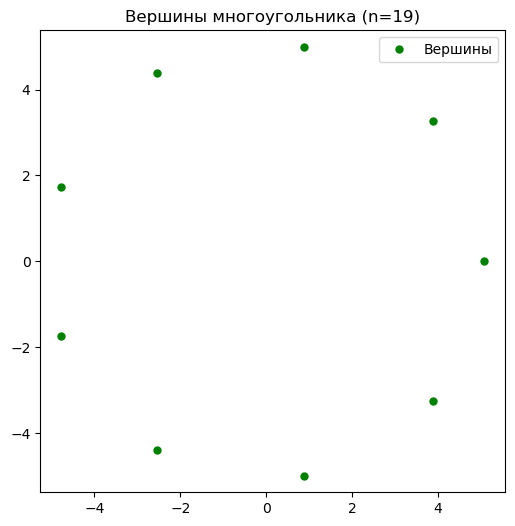

In [50]:
l = 2 * r * np.sin(np.pi / (2 * n))
R = l / (2 * np.sin(np.pi / n))
angles = np.arange(0, 2 * np.pi, 2 * np.pi / n)
vertices = center + R * np.column_stack((np.cos(angles), np.sin(angles)))
plt.figure(figsize=(6,6))
plt.plot(vertices[:, 0], vertices[:, 1], 'go', markersize=5, label='Вершины')
plt.axis('equal')
plt.title("Вершины многоугольника (n=19)")
plt.legend()
plt.show()

## Шаг 3: Построение сторон многоугольника

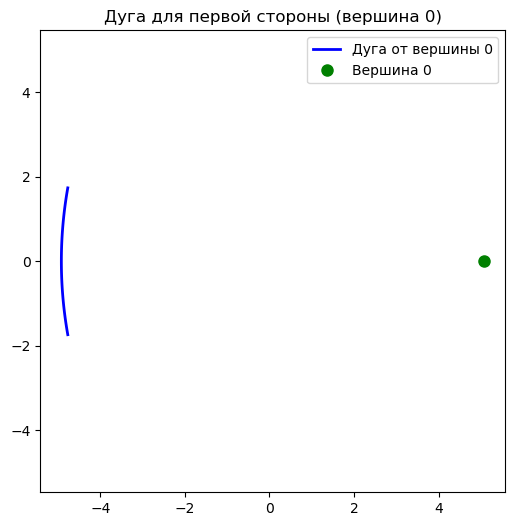

In [55]:
alpha = 2 * np.pi / n  
beta = alpha / 2        

arc_angles = np.linspace(-beta/2, beta/2, N)
side0 = vertices[0] + r * np.column_stack((
    np.cos(arc_angles + np.pi),
    np.sin(arc_angles + np.pi)
))

plt.figure(figsize=(6,6))
plt.plot(side0[:, 0], side0[:, 1], 'b-', lw=2, label='Дуга от вершины 0')
plt.plot(vertices[0, 0], vertices[0, 1], 'go', markersize=8, label='Вершина 0')
plt.axis('equal')
plt.title("Дуга для первой стороны (вершина 0)")
plt.legend()
plt.show()


## Шаг 4: Построение графика многоугольника

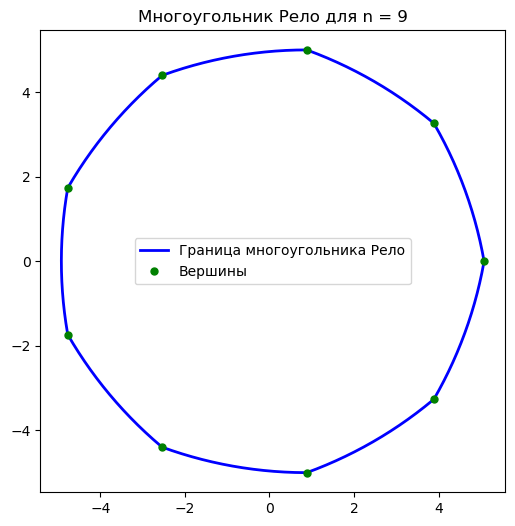

In [57]:
sides_list = [
    vertices[i] + r * np.column_stack((
        np.cos(arc_angles + np.pi + i * alpha),
        np.sin(arc_angles + np.pi + i * alpha)
    ))
    for i in range(n)
]

sides = np.concatenate(sides_list, axis=0)

plt.figure(figsize=(6,6))
plt.plot(sides[:, 0], sides[:, 1], 'b-', lw=2, label='Граница многоугольника Рело')
plt.plot(vertices[:, 0], vertices[:, 1], 'go', markersize=5, label='Вершины')
plt.axis('equal')
plt.title("Многоугольник Рело для n = 9")
plt.legend()
plt.show()

# Задание 4.3. Результирующая пользовательская функция

**а)**
<span style="color:red;">Напишите</span> пользовательскую функцию regular_polygon_Relo(n, center, r, N) на основании кода из Задания 4.2. Функция должна возвращать матрицу, каждая строка которой содержит координаты точек, описывающих границу правильного многоугольника Рело.

Аргументы пользовательской функции:
- n: количество вершин правильного многоугольника Рело; является нечетным целым числом большим 2; стандартное значение 3.
- center: массив координат центра правильного многоугольника Рело; стандартное значение np.array([0, 0]).
- r: ширина правильного многоугольника Рело; является положительным числом, стандартное значение 1.
- N: количество точек для описания одной стороны правильного многоугольника Рело; является натуральным числом; стандартное значение 100.

Код функции не должен использовать переменные из глобальной области видимости модуля. Внутри функции не должно осуществляться отображение многоугольника Рело.

**б)**
<span style="color:red;">Осуществите</span> контроль за значениями аргументов при вызове функции с помощью оператора $ assert $.

**в)**
<span style="color:red;">Укажите</span> аннотации типов и <span style="color:red;">оформите</span> строки документации. <span style="color:red;">Осуществите</span> доступ к аннотации типов и к строкам документации через атрибуты объекта функции.

**г)**
<span style="color:red;">Создайте</span> модуль $ relo.py $, в котором будет содержаться пользовательская функция regular_polygon_Relo.

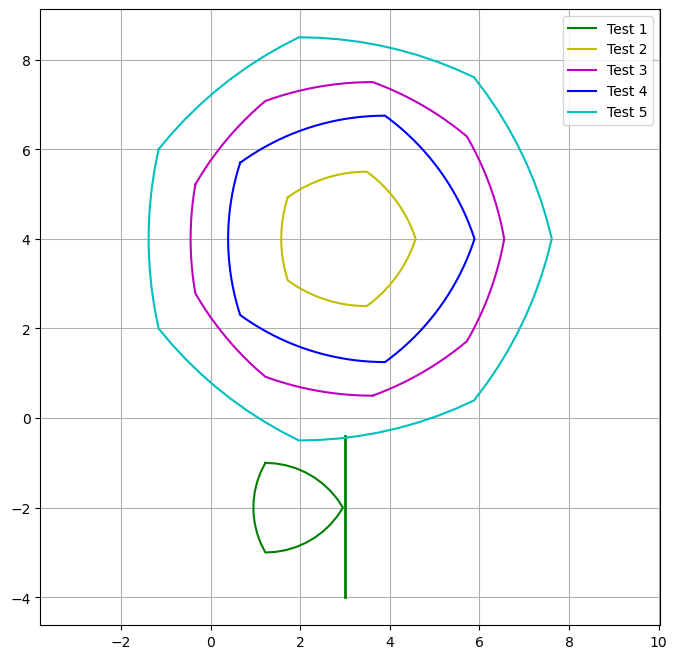

In [290]:
def regular_polygon_Relo(n: int = 9, center: np.ndarray = np.array([0, 0]), r: float = 1, N: int = 100) -> np.ndarray:
    """
    Генерирует координаты точек, описывающих границу правильного многоугольника Рело.

    :param n: Количество вершин (нечетное целое число > 2), по умолчанию 19
    :param center: Координаты центра (массив numpy), по умолчанию np.array([0, 0])
    :param r: Ширина многоугольника (положительное число), по умолчанию 1
    :param N: Количество точек для одной стороны (натуральное число), по умолчанию 100
    :return: Матрица (numpy ndarray), где каждая строка содержит координаты точек границы
    """
    if center is None:
        center = np.array([0.0, 0.0])
    else:
        center = np.array(center, dtype=float)

    assert isinstance(n, int) and n > 2 and (n % 2 == 1), "n must be an odd integer greater than 2"
    assert center.shape == (2,), "center must be a 2-element array representing (x, y)"
    assert isinstance(r, (int, float)) and r > 0, "r must be a positive number"
    assert isinstance(N, int) and N > 0, "N must be a positive integer"
    
    l: float = 2 * r * np.sin(np.pi / (2 * n))
    R: float = l / (2 * np.sin(np.pi / n))
    angles: np.ndarray = np.arange(0, 2 * np.pi, 2 * np.pi / n)
    vertices: np.ndarray = center + R * np.column_stack((np.cos(angles), np.sin(angles)))
    
    alpha: float = 2 * np.pi / n   
    beta: float = alpha / 2        
    arc_angles: np.ndarray = np.linspace(-beta / 2, beta / 2, N)

    sides_list = [
        vertices[i] + r * np.column_stack((
            np.cos(arc_angles + np.pi + i * alpha),
            np.sin(arc_angles + np.pi + i * alpha)
        ))
        for i in range(n)
    ]
    sides: np.ndarray = np.concatenate(sides_list, axis=0)
    
    return sides

def main():
    polygon = regular_polygon_Relo(19, np.array([0, 0]), 10, 100)

    plt.figure(figsize=(6, 6))
    plt.plot(polygon[:, 0], polygon[:, 1], 'b-', lw=2, label='Граница многоугольника Рело')
    plt.axis('equal')
    plt.title("Многоугольник Рело для n = 9")
    plt.legend()
    plt.show()

    print("Type annotations:")
    print(regular_polygon_Relo.__annotations__)
    
    print("\nFunction docstring:")
    print(regular_polygon_Relo.__doc__)
    main()
    from relo import regular_polygon_Relo

test_cases = [
    (3, np.array([1.8, -2]), 2, 10),
    {"n": 5, "center": np.array([3, 4]), "r": 3, "N": 70},
    (9, np.array([3, 4]), 7, 25),
    {"n": 5, "center": np.array([3, 4]), "r": 5.5, "N": 100},
    (7, np.array([3, 4]), 9, 10)
]

plt.figure(figsize=(8, 8))
colors = ['g', 'y', 'm', 'b', 'c']
x1, y1 = 3, -0.4
x2, y2 = 3, -4
plt.plot([x1, x2], [y1, y2], 'g-', linewidth=2)
for i, case in enumerate(test_cases):
    try:
        points = regular_polygon_Relo(**case) if isinstance(case, dict) else regular_polygon_Relo(*case)
        plt.plot(points[:, 0], points[:, 1], color=colors[i % len(colors)], label=f"Test {i+1}")
    except AssertionError as e:
        print(f"Ошибка в тесте {i+1}: {e}")

plt.axis("equal")
plt.legend()
plt.grid()
plt.show()